Optimized a step (0.8)
Optimized a step (0.08)
Optimized a step (0.008)


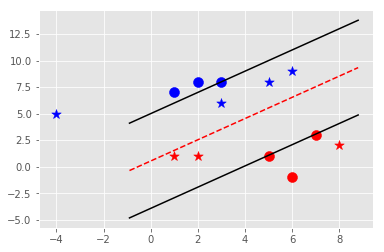

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.color = {1:'r' , -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    def fit(self, data):
        self.data = data
        
        self.transform = [[1,1],[-1,1],[-1,-1],[1,-1]]
        all_data = []
        for yi in data:
            for featureSet in data[yi]:
                for feature in featureSet:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # we control in the accuracy of the svm algorithm from here 
        # every time we give very lower step the accuracy increase but it more more expensive 
        # if you try 0.001 it will give heigh accuarcy but more expensive
        # the best way to do this by running your model in remote server as 'colab'
        self.step_size = [self.max_feature_value * 0.1,
                         self.max_feature_value * 0.01,
                         self.max_feature_value * 0.001]
        # extreamly expensive
        b_range_multiple = 5
        # we dont need to take small steps with b as we do w
        b_multiple = 5
        letest_optimum = self.max_feature_value*10
        
        opt_dict = {}
        for step in self.step_size:
            # initial weight
            w = np.array([letest_optimum,letest_optimum])
            optimize = False
            while not optimize:
                # for(-1*Max*b_r_m , Max*b_r_m , step*b_m)
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple, step*b_multiple ):
                    for transformation in self.transform:
                        w_t = w*transformation
                        found_option = True
    
                        for i in self.data:
                            yi = i 
                            for xi in data[i]:
                                # yi(w*x + b) >= 1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    break
                        if found_option:
                                # {||w_t|| : [w_t,b]}
                                opt_dict[np.linalg.norm(w_t)] = [w_t,b] # store optimum wheights
                    
                if w[0]  < 0:
                    optimize = True
                    print("Optimized a step ({})".format(step))
                else:
                    w = w - step
                    
                    
        norms = sorted([n for n in opt_dict])
        opt_choice = opt_dict[norms[0]]
        self.w = opt_choice[0]
        self.b = opt_choice[1]
        letest_optimum = opt_choice[0][0] + step*2
        
        
                    
                        
            
    
    def predict(self, feature):
#         sign( x.w+b )
        classification = np.sign(np.dot(np.array(feature), self.w) + self.b)
        
        if classification != 0 and self.visualization:
            self.ax.scatter(feature[0], feature[1], s=100, marker='*', color=self.color[classification] )
        return classification
    
    def Visualize(self):
        [[self.ax.scatter(x[0],x[1], color=self.color[i], s=100) for x in data_dict[i]] for i in data_dict]
        
        

            # hyperplan = x.w +b
            # v = x.w +b
            # posv  = 1
            # negv  = -1
            # dec   = 0

        def Hyperplan(x,w,b,v):
            res = (-w[0]*x-b+v) / w[1]
            return res
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # postive support vector hyperplan
        psv1 = Hyperplan(hyp_x_min ,self.w, self.b, 1)
        psv2 = Hyperplan(hyp_x_max ,self.w, self.b, 1)
        self.ax.plot([hyp_x_min , hyp_x_max],[psv1, psv2], 'k')

#        (w.x+b) = -1
#        negative support vector hyperplan
        neg1 = Hyperplan(hyp_x_min ,self.w, self.b, -1)
        neg2 = Hyperplan(hyp_x_max ,self.w, self.b, -1)
        self.ax.plot([hyp_x_min , hyp_x_max],[neg1, neg2],'k')
        
        
#        (w.x+b) = 0
#        decision support vector hyperplan
        dec1 = Hyperplan(hyp_x_min ,self.w, self.b, 0)
        dec2 = Hyperplan(hyp_x_max ,self.w, self.b, 0)
        self.ax.plot([hyp_x_min , hyp_x_max],[dec1, dec2],'r--')        






data_dict = {-1:np.array([[1,7],[2,8],[3,8]]) 
             ,1:np.array([[5,1],[6,-1],[7,3]]) }


svm = Support_Vector_Machine()

svm.fit(data_dict)

predict_us = [[1,1],
              [5,8],
              [8,2],
              [6,9],
              [-4,5],
              [3,6],
              [2,1]]
for p in predict_us:
    svm.predict(p)
svm.Visualize()

here we see that we not have the best support vectors, due to our step which we choosed.
for best support vectors try step=0.001 but it very expensive in my pc